# ケーススタディ２： 回帰

UCIで提供されているデータセット[Bike Sharing Dataset](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)を使う。

機械学習を使って、自転車の貸出の予測をする例

In [63]:
!pip3 install -U ucimlrepo --break-system-packages | tail -1

In [82]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 

{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

## データ確認

In [109]:
display(X[:30])
display(X.shape, y.shape)


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000


(17379, 13)

(17379, 1)

※ **日付に重複がある！！**

In [110]:
import pandas as pd

X0 = pd.concat([X, y], axis=1)

print(X0.head())
#
X0 = X0.groupby('dteday', as_index=False).mean()
X0 = X0.drop(['hr'], axis=1)
y0 = X0['cnt']
X0 = X0.drop(['cnt'], axis=1)

       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  


In [111]:
X0['dteday'].value_counts()

dteday
2011-01-01    1
2012-04-25    1
2012-04-27    1
2012-04-28    1
2012-04-29    1
             ..
2011-09-03    1
2011-09-04    1
2011-09-05    1
2011-09-06    1
2012-12-31    1
Name: count, Length: 731, dtype: int64

「日付の扱い」も、このケーススタディのテーマの１つ

In [112]:
X0.columns = ['日付', '季節', '年', '月', '祝日', '曜日', '勤務日', '天気', '気温', '体感温度', '湿度', '風速']
#X.columns
print(X0.head())

           日付   季節    年    月   祝日   曜日  勤務日        天気        気温      体感温度  \
0  2011-01-01  1.0  0.0  1.0  0.0  6.0  0.0  1.583333  0.344167  0.363625   
1  2011-01-02  1.0  0.0  1.0  0.0  0.0  0.0  1.956522  0.363478  0.353739   
2  2011-01-03  1.0  0.0  1.0  0.0  1.0  1.0  1.000000  0.196364  0.189405   
3  2011-01-04  1.0  0.0  1.0  0.0  2.0  1.0  1.043478  0.200000  0.212122   
4  2011-01-05  1.0  0.0  1.0  0.0  3.0  1.0  1.000000  0.226957  0.229270   

         湿度        風速  
0  0.805833  0.160446  
1  0.696087  0.248539  
2  0.437273  0.248309  
3  0.590435  0.160296  
4  0.436957  0.186900  


In [113]:
X0.isnull().sum()

日付      0
季節      0
年       0
月       0
祝日      0
曜日      0
勤務日     0
天気      0
気温      0
体感温度    0
湿度      0
風速      0
dtype: int64

欠損値はゼロ

In [114]:
y0.head()

0    41.041667
1    34.826087
2    61.318182
3    67.913043
4    69.565217
Name: cnt, dtype: float64

array([[<Axes: title={'center': '季節'}>, <Axes: title={'center': '年'}>,
        <Axes: title={'center': '月'}>],
       [<Axes: title={'center': '祝日'}>, <Axes: title={'center': '曜日'}>,
        <Axes: title={'center': '勤務日'}>],
       [<Axes: title={'center': '天気'}>, <Axes: title={'center': '気温'}>,
        <Axes: title={'center': '体感温度'}>],
       [<Axes: title={'center': '湿度'}>, <Axes: title={'center': '風速'}>,
        <Axes: >]], dtype=object)

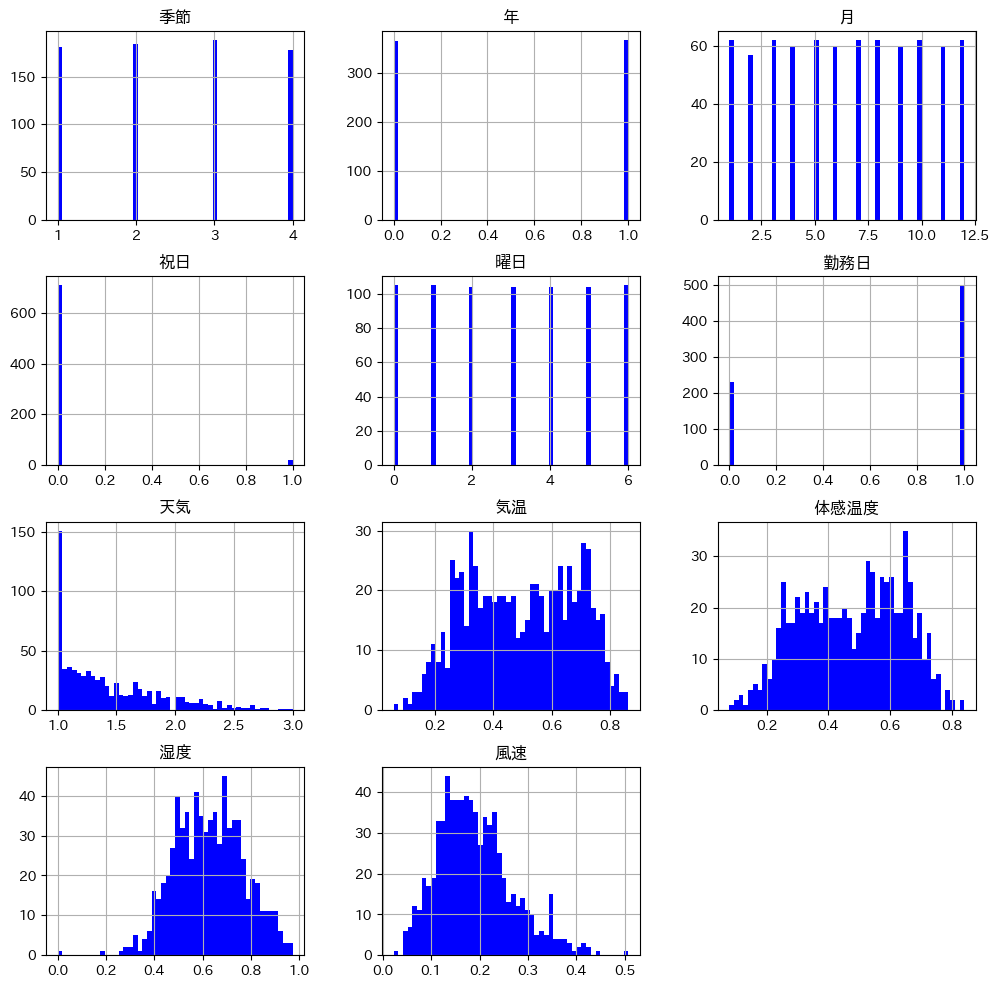

In [115]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = (12, 12)

X0.hist(bins=50, color='b')

Text(0.5, 1.0, '利用者の時間推移')

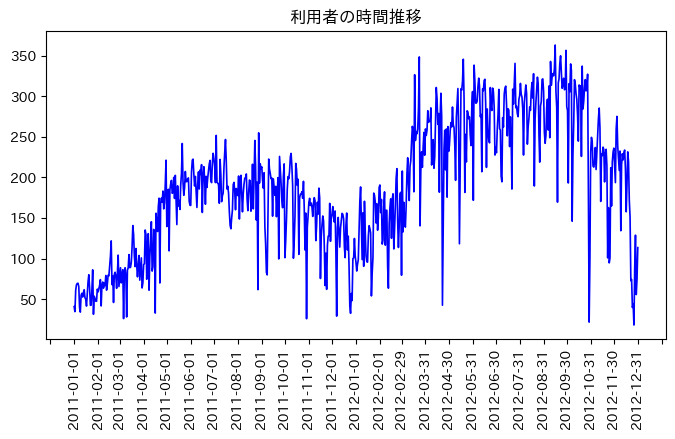

In [116]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X0['日付'], y0, c='b')
#weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)

ax.tick_params(axis='x', rotation=90)
#ax.grid()
ax.set_title('利用者の時間推移')




1. 情報として「年」「月」があるので「日付」の情報は冗長として落とす

詳細な日付まで含めた回帰は、時系列分析に該当する。今回は「回帰」と割り切って分析する。

2. 「回帰」なので、特定の日付の前後で訓練データ、テストデータに分割する

２０１２年１１月１日を区切り日とする。

In [117]:
X1 = X0.drop(['日付'], axis=1)
y1 = y0.values

In [118]:
import pandas as pd

mday = pd.to_datetime('2012-11-1')

# ucimlrepoのローダで日付はobject型となっているので変換が必要
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html
X0['日付'] = X0['日付'].map(pd.to_datetime)

train_index = X0['日付'] < mday
test_index = X0['日付'] >= mday

x_train = X1[train_index]
x_test = X1[test_index]

y_train = y1[train_index]
y_test = y1[test_index]

dates_test = X0['日付'][test_index]

print(x_train.head())
print(x_train.tail())
print('-' * 50)
print(x_test.head())
print(x_test.tail())

    季節    年    月   祝日   曜日  勤務日        天気        気温      体感温度        湿度  \
0  1.0  0.0  1.0  0.0  6.0  0.0  1.583333  0.344167  0.363625  0.805833   
1  1.0  0.0  1.0  0.0  0.0  0.0  1.956522  0.363478  0.353739  0.696087   
2  1.0  0.0  1.0  0.0  1.0  1.0  1.000000  0.196364  0.189405  0.437273   
3  1.0  0.0  1.0  0.0  2.0  1.0  1.043478  0.200000  0.212122  0.590435   
4  1.0  0.0  1.0  0.0  3.0  1.0  1.000000  0.226957  0.229270  0.436957   

         風速  
0  0.160446  
1  0.248539  
2  0.248309  
3  0.160296  
4  0.186900  
      季節    年     月   祝日   曜日  勤務日        天気        気温      体感温度        湿度  \
665  4.0  1.0  10.0  0.0  6.0  0.0  1.583333  0.530000  0.515133  0.720000   
666  4.0  1.0  10.0  0.0  0.0  0.0  2.375000  0.477500  0.467771  0.694583   
667  4.0  1.0  10.0  0.0  1.0  1.0  3.000000  0.440000  0.439400  0.880000   
668  4.0  1.0  10.0  0.0  2.0  1.0  2.363636  0.318182  0.309909  0.825455   
669  4.0  1.0  10.0  0.0  3.0  1.0  1.625000  0.357500  0.361100  0.666667 

## 学習・評価

In [119]:
from xgboost import XGBRegressor

algorithm = XGBRegressor(objective='reg:squarederror', random_state=123)
algorithm.fit(x_train, y_train)

y_pred = algorithm.predict(x_test)
print(y_pred[:5])

score = algorithm.score(x_test, y_test)

from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_pred)
print(f'score: {score:.4f} / r2_score: {r2score:.4f}')

[227.78603 232.35013 205.22604 199.37521 208.33298]
score: 0.5535 / r2_score: 0.5535


algorithm.scoreとr2_scoreの値が一致するのは、xgboost.XGBRegressor.scoreも
同じ関数を使っているから。

一般にR^2 scoreは0.5以上であれば、良いモデルであるとされている。

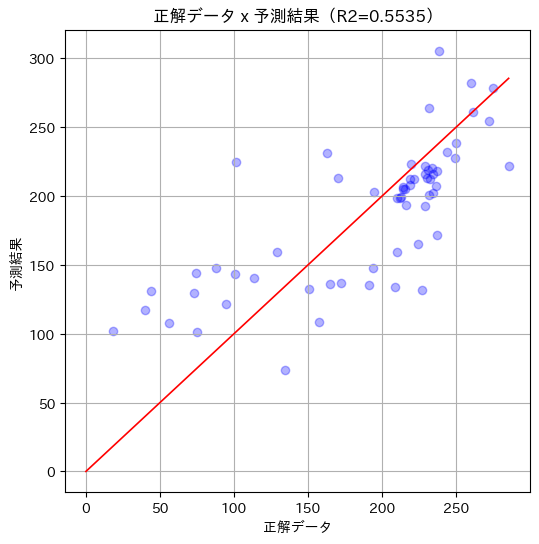

In [120]:
plt.figure(figsize=(6, 6))
y_max = y_test.max()
plt.plot((0, y_max), (0, y_max), c='r')
plt.scatter(y_test, y_pred, c='b', alpha=0.3)
plt.title(f'正解データ x 予測結果（R2={r2score:.4f}）')
plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.grid()

今回、回帰分析であり、時系列分析ではなかったが、時系列グラフも確認してみる

Text(0.5, 1.0, '利用者予測')

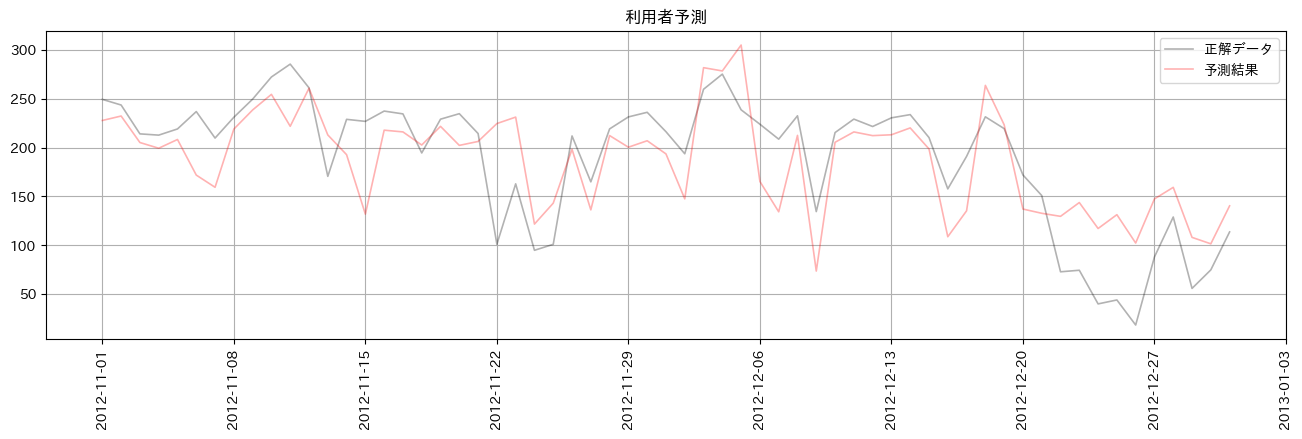

In [121]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(dates_test, y_test, label='正解データ', c='k', alpha=0.3)
ax.plot(dates_test, y_pred, label='予測結果', c='r', alpha=0.3)

weeks = mdates.WeekdayLocator(byweekday=mdates.TH)

ax.xaxis.set_major_locator(weeks)

ax.tick_params(axis='x', rotation=90)

ax.grid()
ax.legend()
ax.set_title('利用者予測')

入力データに関して「月」と「季節」は周期性があるのに、最初の値と最後の値に連続性がない（いちばん離れている）。
そこでOne Hotエンコーディングを適用してみる。

In [104]:
def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix=column).astype(int)
    df = pd.concat([df.drop([column], axis=1), df_dummy], axis=1)
    return df

X2 = X1.copy()
X2 = enc(X2, '月')
X2 = enc(X2, '季節')

X2.head()

,年,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,月_1.0,...,月_7.0,月_8.0,月_9.0,月_10.0,月_11.0,月_12.0,季節_1.0,季節_2.0,季節_3.0,季節_4.0
0,0.0,0.0,6.0,0.0,1.583333,0.344167,0.363625,0.805833,0.160446,1,...,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,1.956522,0.363478,0.353739,0.696087,0.248539,1,...,0,0,0,0,0,0,1,0,0,0
2,0.0,0.0,1.0,1.0,1.000000,0.196364,0.189405,0.437273,0.248309,1,...,0,0,0,0,0,0,1,0,0,0
3,0.0,0.0,2.0,1.0,1.043478,0.200000,0.212122,0.590435,0.160296,1,...,0,0,0,0,0,0,1,0,0,0
4,0.0,0.0,3.0,1.0,1.000000,0.226957,0.229270,0.436957,0.186900,1,...,0,0,0,0,0,0,1,0,0,0


In [122]:
from xgboost import XGBRegressor

algorithm = XGBRegressor(objective='reg:squarederror', random_state=123)

x2_train = X2[train_index]
x2_test = X2[test_index]
y2_train = y1[train_index]
y2_test = y1[test_index]

algorithm.fit(x2_train, y2_train)

y2_pred = algorithm.predict(x2_test)


score2 = algorithm.score(x2_test, y2_test)

from sklearn.metrics import r2_score

r2score2 = r2_score(y2_test, y2_pred)

print(y_pred[:5])
print(f'score: {score:.4f} / r2_score: {r2score:.4f}')
print(y2_pred[:5])
print(f'score: {score2:.4f} / r2_score: {r2score2:.4f}')

[227.78603 232.35013 205.22604 199.37521 208.33298]
score: 0.5535 / r2_score: 0.5535
[213.35289 227.44919 202.37108 190.70111 202.4904 ]
score: 0.5263 / r2_score: 0.5263


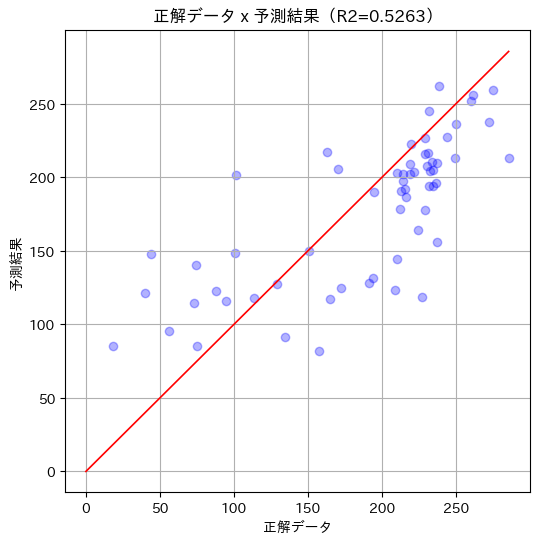

In [123]:
plt.figure(figsize=(6, 6))
y2_max = y2_test.max()
plt.plot((0, y2_max), (0, y2_max), c='r')
plt.scatter(y2_test, y2_pred, c='b', alpha=0.3)
plt.title(f'正解データ x 予測結果（R2={r2score2:.4f}）')
plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.grid()

散布図で見た目の違いは顕著ではないが、R2 scoreが下がっている！
One Hotエンコーディングは、有効ではなかった、ということ（書籍とデータセットのバージョンが違う）。

Text(0.5, 1.0, '利用者予測')

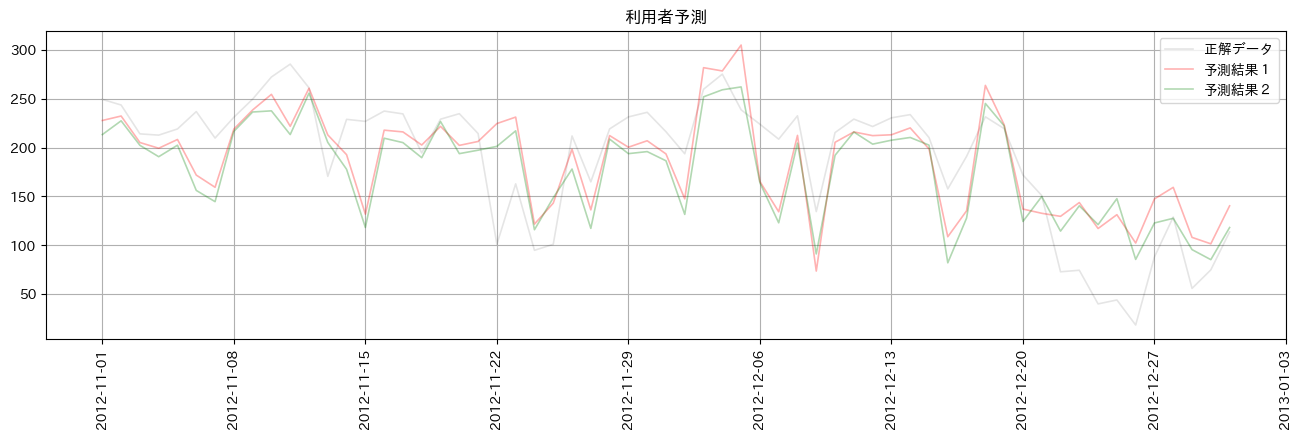

In [124]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(dates_test, y2_test, label='正解データ', c='k', alpha=0.1)
ax.plot(dates_test, y_pred, label='予測結果１', c='r', alpha=0.3)
ax.plot(dates_test, y2_pred, label='予測結果２', c='g', alpha=0.3)

weeks = mdates.WeekdayLocator(byweekday=mdates.TH)

ax.xaxis.set_major_locator(weeks)

ax.tick_params(axis='x', rotation=90)

ax.grid()
ax.legend()
ax.set_title('利用者予測')

<Axes: title={'center': '重要度分析（利用者数）'}, xlabel='F score', ylabel='Features'>

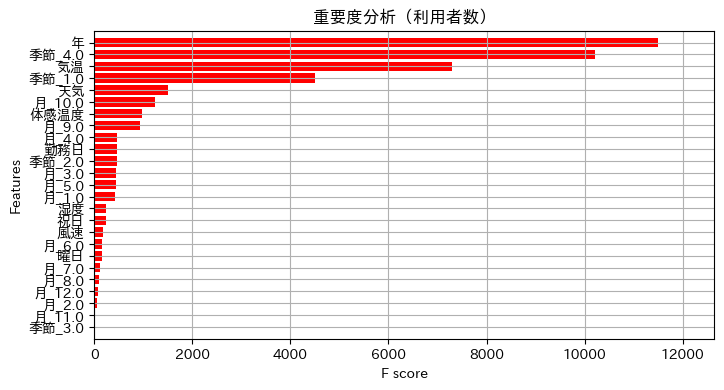

In [125]:
import xgboost as xgb

fig, ax = plt.subplots(figsize=(8, 4))
xgb.plot_importance(algorithm, ax=ax, height=0.8, importance_type='gain', show_values=False, title='重要度分析（利用者数）')

「年」「季節（９〜１２月）」「気温」の影響が大きい。